# Life Expectancy and GDP

For this project, you will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries.

During this project, you will analyze, prepare, and plot data in order to answer questions in a meaningful way.

After you perform your analysis, you’ll be creating a blog post to share your findings on the World Health Organization website.

Project Objectives:
Complete a project to add to your portfolio
Use seaborn and Matplotlib to create visualizations
Become familiar with presenting and sharing data visualizations
Preprocess, explore, and analyze data

Prerequisites:
Data Acquisition
Data Visualization
Hypothesis Testing
Summarizing Quantitative Data
Data Wrangling and Tidying
Data Manipulation with Pandas

In [283]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import minmax_scale

%matplotlib inline

In [284]:
raw_df = pd.read_csv("all_data.csv")
df = raw_df.rename(columns={"Life expectancy at birth (years)" : "LEABY"})
df.Country = df.Country.replace("United States of America", "USA")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LEABY    96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


From the above we can see that there are no missing values. Data appears to be typed correctly. I have renamed the life expectancy to make it easier to work with. United States of America was abbreviated to USA for the same reason.

I will create violinplots by country to see if there are any outliers and to get a sense of the distributions.

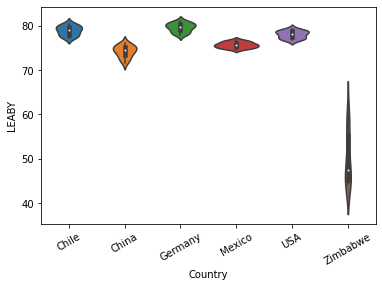

In [285]:
sns.violinplot(data=df, x='Country', y='LEABY')
plt.xticks(rotation=30);

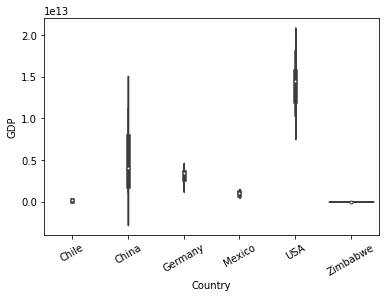

In [286]:
sns.violinplot(data=df, x='Country', y='GDP')
plt.xticks(rotation=30);

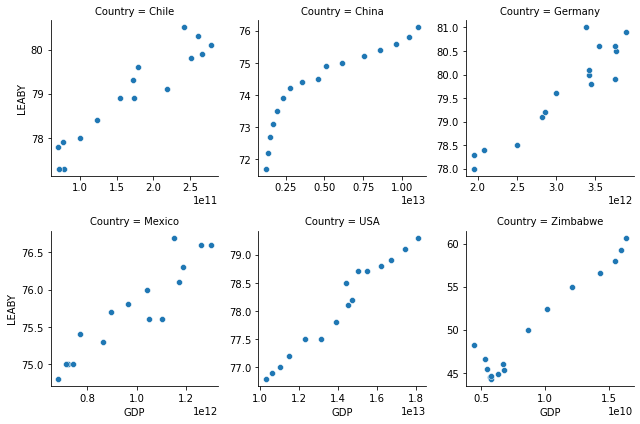

In [355]:
#Make individual scatterplots for each country, gdp vs. life expectancy
# for country in df['Country'].unique():
#     sns.scatterplot(data=df[df['Country']==country], x='GDP', y='LEABY')
#     plt.title(country)
#     plt.show()
    
    
# Here's the same thing but using a FacetGrid (hope you don't mind really):

'''
I didn't get how to use FacetGrid() in Seaborn and preferred Matplotlib's subplot()
until I watched this video: https://www.youtube.com/watch?v=YYeqJllXHxM
Now I feel like FacetGrid is actually smarter and easier to use! 
'''

g = sns.FacetGrid(df, col="Country", col_wrap=3, sharey=False, sharex=False)
g.map(sns.scatterplot, 'GDP', 'LEABY');

#### So how correlated are those exactly?

First, I would like to compare GDP and LEABY, but also see how both have changed over the years for each country. This makes it necessary to bring the numbers to scale first (all values are in the range of 0 and 1.. the scikit-learn library will take care of this).

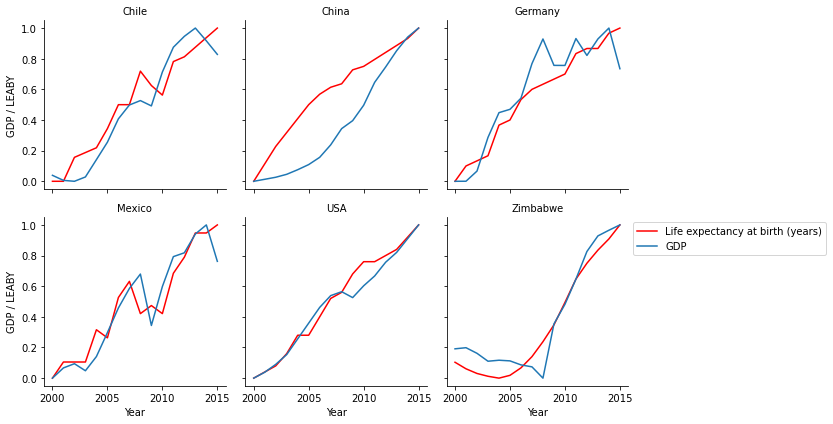

In [357]:
# Create two empty pandas.Series
series_GDP_scaled = pd.Series([], dtype="float64")
series_LEABY_scaled = pd.Series([], dtype="float64")

# Scale and append GDP & LEABY for each country individually
for country in df.Country.unique():
    series_GDP_scaled = series_GDP_scaled.append(
        pd.Series(minmax_scale(df[df.Country == country].GDP)), ignore_index=True
    )
    series_LEABY_scaled = series_LEABY_scaled.append(
        pd.Series(minmax_scale(df[df.Country == country].LEABY)), ignore_index=True
    )

# Make the two Series part of the DataFrame
df["GDP_scaled"] = series_GDP_scaled
df["LEABY_scaled"] = series_LEABY_scaled

# Draw the graph
g = sns.FacetGrid(df, col="Country", col_wrap=3)
g.map(sns.lineplot, "Year", "LEABY_scaled", color="r")
g.map(sns.lineplot, "Year", "GDP_scaled")
g.set_axis_labels("Year","GDP / LEABY")
g.set_titles(col_template="{col_name}")
plt.legend(labels=["Life expectancy at birth (years)", "GDP"], bbox_to_anchor=(1, 1));

#### Comparison of correlation of GDP and LEABY by country

In [358]:
correlation_dictionary = {
    country: df[df.Country == country].GDP.corr(df[df.Country == country].LEABY) 
    for country in df.Country.unique()
}

sorted(correlation_dictionary.items(), key=lambda x: x[1], reverse=True)

[('USA', 0.9817092382430256),
 ('Zimbabwe', 0.9661998955858779),
 ('Chile', 0.9498766659254417),
 ('Germany', 0.9326988982561274),
 ('Mexico', 0.9322377167847082),
 ('China', 0.9085255408648356)]

While it is obvious that GDP and LEABY are strongly correlated, the Pearson correlation coefficient (at least I suppose that that's what Pandas is returning here) differs slightly from country to country. Unable to recognize a pattern and at a loss about the statistical significance of